# Logistic Regression to Predict Heart Disease

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.listdir('.')

['framingham.xls', 'LogisticRegressionMedicalData.ipynb', '.ipynb_checkpoints']

In [4]:
df = pd.read_csv('framingham.xls')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Let's see how education and smoking look like 

In [5]:
print(df['education'].unique())
print(df['cigsPerDay'].unique())

[ 4.  2.  1.  3. nan]
[ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]


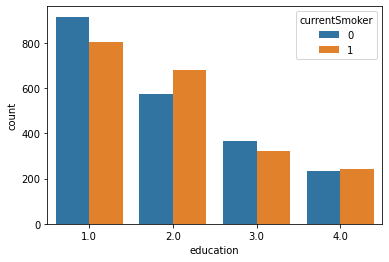

In [6]:
sns.countplot(df['education'], hue=df['currentSmoker'])

In [7]:
cigsPerDay_bins = round(df['cigsPerDay'].max()-df['cigsPerDay'].min())
education_bins = round(df['education'].max()-df['education'].min())
totChol_bins = round(df['totChol'].max()-df['totChol'].min())
sysBP_bins = round(df['sysBP'].max()-df['sysBP'].min())

/Users/sck/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/sck/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


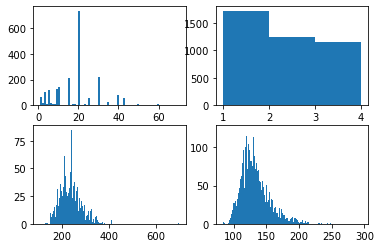

In [8]:
plt.subplot(2,2,1)
filt_1 = df['cigsPerDay'] != 0
plt.hist(df.loc[filt_1, 'cigsPerDay'], bins=cigsPerDay_bins);
plt.subplot(2,2,2)
filt_2 = df['education'] != 0
plt.hist(df.loc[filt_2, 'education'], bins=education_bins);
plt.subplot(2,2,3)
filt_3 = df['totChol'] != 0
plt.hist(df.loc[filt_3, 'totChol'], bins=totChol_bins);
plt.subplot(2,2,4)
filt_4 = df['sysBP'] != 0
plt.hist(df.loc[filt_4, 'sysBP'], bins=sysBP_bins);

In [9]:
print('Data shape: ',df.shape, '\n')
print('*******************************')
print('Data means:\n',df.mean(), '\n')
print('*******************************')
print('Data features count:\n',df.count(), '\n')
print('*******************************')
print('Data Info about null vals:\n',df.info(), '\n')
print('*******************************')
print('Data Features null vals:\n',df.isnull().sum(), '\n')

Data shape:  (4238, 16) 

*******************************
Data means:
 male                 0.429212
age                 49.584946
education            1.978950
currentSmoker        0.494101
cigsPerDay           9.003089
BPMeds               0.029630
prevalentStroke      0.005899
prevalentHyp         0.310524
diabetes             0.025720
totChol            236.721585
sysBP              132.352407
diaBP               82.893464
BMI                 25.802008
heartRate           75.878924
glucose             81.966753
TenYearCHD           0.151958
dtype: float64 

*******************************
Data features count:
 male               4238
age                4238
education          4133
currentSmoker      4238
cigsPerDay         4209
BPMeds             4185
prevalentStroke    4238
prevalentHyp       4238
diabetes           4238
totChol            4188
sysBP              4238
diaBP              4238
BMI                4219
heartRate          4237
glucose            3850
TenYearCHD        

### Let's have a look at correlations between columns

In [10]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


#### This doesn't look good. Let's try seaborn's heatmap

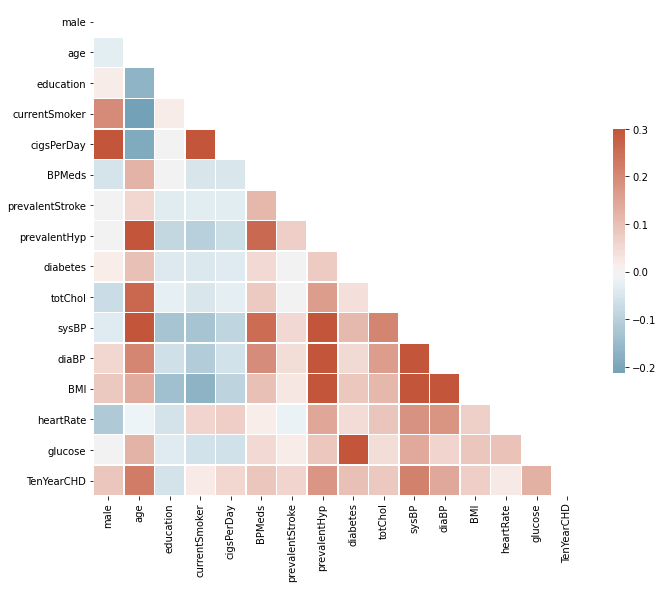

In [11]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

This map is better. Although it is easier to see correlations, the maximum correlation is 30% which is not much. Another observation is about education. Education is not correlated with other variables.
Let's list the correlations ordered from highest to lowest.

In [12]:
k = corr.unstack().sort_values(kind='quicksort', ascending=False)
print(type(k))
print(k.index)
print(k)

<class 'pandas.core.series.Series'>
MultiIndex([(     'TenYearCHD',      'TenYearCHD'),
            (        'glucose',         'glucose'),
            (            'age',             'age'),
            (      'education',       'education'),
            (  'currentSmoker',   'currentSmoker'),
            (     'cigsPerDay',      'cigsPerDay'),
            (         'BPMeds',          'BPMeds'),
            ('prevalentStroke', 'prevalentStroke'),
            (   'prevalentHyp',    'prevalentHyp'),
            (       'diabetes',        'diabetes'),
            ...
            (            'BMI',       'education'),
            (      'education',             'BMI'),
            (            'age',       'education'),
            (      'education',             'age'),
            (            'BMI',   'currentSmoker'),
            (  'currentSmoker',             'BMI'),
            (            'age',      'cigsPerDay'),
            (     'cigsPerDay',             'age'),
            

The '1' values do not allow me to see the true values I'm looking for. Therefore, I have to filter out the '1' values.

In [13]:
k2 = k[k!=1]
print(k2)

diaBP          sysBP            0.784002
sysBP          diaBP            0.784002
cigsPerDay     currentSmoker    0.769690
currentSmoker  cigsPerDay       0.769690
prevalentHyp   sysBP            0.696755
                                  ...   
currentSmoker  BMI             -0.167650
age            cigsPerDay      -0.192791
cigsPerDay     age             -0.192791
currentSmoker  age             -0.213748
age            currentSmoker   -0.213748
Length: 240, dtype: float64


I first thought that the highest correlation was about 30%, where I turned out to be wrong. Since I'm not a medical doctor I can't comment on the meaning of these correlations.

Let's have a look at distribution plots too.

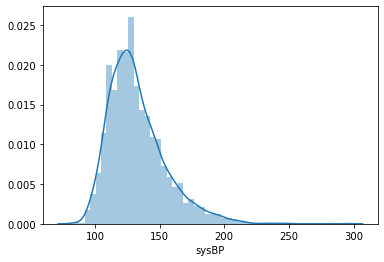

In [14]:
sns.distplot(df['sysBP'])

We already did histograms on the columns. Therefore, I'll leave the distribution plots like this now.

### Now it is time to do the logistic regression
Before we go ahead, we need to eliminate the NaN variables.

In [15]:
df.shape

(4238, 16)

In [16]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

We will be losing some data with droping rows but since I am not a medical doctor, I cannot evaluate replacing missing values with anything else. Dropping them is the easiest way for now.

In [17]:
df.dropna(inplace=True)

We break the data into input and target variables next.

In [18]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD', axis='columns')

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We want to normalize the data before we go any further.

In [20]:
from sklearn.preprocessing import StandardScaler
# Create an instance of the scaler and apply it to the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We will train and fit the model without grid search with default settings. The accuracy score is 0.84699 as shown below. Let's try to improve this.

In [21]:
from sklearn.linear_model import LogisticRegression
LogReg_clf = LogisticRegression()
LogReg_clf.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = LogReg_clf.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

acc =  accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(acc)
print(cm)

0.8592896174863388
[[621   4]
 [ 99   8]]


We can do better than this. Let's try changing hyperparameters in the regression. The first one is the penalty parameter. The options we have are l1, l2 and elasticnet.

In [24]:
from sklearn.model_selection import GridSearchCV
# LogReg_clf2 is our new classifier
LogReg_clf2 = LogisticRegression()
parameters = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_search = GridSearchCV(estimator=LogReg_clf2, param_grid=parameters)

grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.850889 using {'C': 0.1, 'solver': 'newton-cg'}


There is an improvement from 0.84699 but it is still not as high as it could be. In the source page the guys are talking about getting 0.88 which is higher than mine. I'm not sure how they got that score.

In [27]:
LogReg_clf3 = LogisticRegression(C=0.1, solver='liblinear')
LogReg_clf3.fit(X_train, y_train)
y_pred3 = LogReg_clf3.predict(X_test)
acc2 =  accuracy_score(y_test, y_pred3)
print(acc2)

0.8592896174863388
